In [5]:
import mnist
import numpy as np
from conv import Conv3x3
from maxpool import MaxPool2
from softmax import Softmax

# We only use the first 1k examples of each set in the interest of time.
# Feel free to change this if you want.
train_images = mnist.train_images()[:1000]
train_labels = mnist.train_labels()[:1000]
test_images = mnist.test_images()[:1000]
test_labels = mnist.test_labels()[:1000]

conv = Conv3x3(8)                  # 28x28x1 -> 26x26x8
pool = MaxPool2()                  # 26x26x8 -> 13x13x8
softmax = Softmax(13 * 13 * 8, 10) # 13x13x8 -> 10
filter_before_inverse, filter_after_inverse = 0,0
def forward(image, label):
    '''
    Completes a forward pass of the CNN and calculates the accuracy and
    cross-entropy loss.
    - image is a 2d numpy array
    - label is a digit
    '''
    # We transform the image from [0, 255] to [-0.5, 0.5] to make it easier
    # to work with. This is standard practice.
    out = conv.forward((image / 255) - 0.5)
#     filter_before_inverse, filter_after_inverse = conv.return_filters()
# #     print(filter_before_inverse)
    out = pool.forward(out)
    out = softmax.forward(out)

    # Calculate cross-entropy loss and accuracy. np.log() is the natural log.
    loss = -np.log(out[label])
    acc = 1 if np.argmax(out) == label else 0

    return out, loss, acc

def train(im, label, lr=.005):
    '''
    Completes a full training step on the given image and label.
    Returns the cross-entropy loss and accuracy.
    - image is a 2d numpy array
    - label is a digit
    - lr is the learning rate
    '''
    # Forward
    out, loss, acc = forward(im, label)

    # Calculate initial gradient
    gradient = np.zeros(10)
    gradient[label] = -1 / out[label]

    # Backprop
    gradient = softmax.backprop(gradient, lr)
    gradient = pool.backprop(gradient)
    gradient = conv.backprop(gradient, lr)

    return loss, acc

print('MNIST CNN initialized!')

# Train the CNN for 3 epochs
for epoch in range(1):
    print('--- Epoch %d ---' % (epoch + 1))

    # Shuffle the training data
    permutation = np.random.permutation(len(train_images))
    train_images = train_images[permutation]
    train_labels = train_labels[permutation]

    # Train!
    loss = 0
    num_correct = 0
    for i, (im, label) in enumerate(zip(train_images, train_labels)):
        if i % 100 == 99:
            print(
            '[Step %d] Past 100 steps: Average Loss %.3f | Accuracy: %d%%' %
            (i + 1, loss / 100, num_correct)
            )
            loss = 0
            num_correct = 0

        l, acc = train(im, label)
        loss += l
        num_correct += acc

MNIST CNN initialized!
--- Epoch 1 ---
[Step 100] Past 100 steps: Average Loss 2.246 | Accuracy: 16%
[Step 200] Past 100 steps: Average Loss 2.084 | Accuracy: 35%
[Step 300] Past 100 steps: Average Loss 1.730 | Accuracy: 53%
[Step 400] Past 100 steps: Average Loss 1.105 | Accuracy: 68%
[Step 500] Past 100 steps: Average Loss 0.934 | Accuracy: 73%
[Step 600] Past 100 steps: Average Loss 0.807 | Accuracy: 69%
[Step 700] Past 100 steps: Average Loss 0.867 | Accuracy: 73%
[Step 800] Past 100 steps: Average Loss 0.718 | Accuracy: 77%
[Step 900] Past 100 steps: Average Loss 0.701 | Accuracy: 81%
[Step 1000] Past 100 steps: Average Loss 0.726 | Accuracy: 78%


In [14]:
# Test the CNN
# print('\n--- Testing the CNN Normal---')
# loss = 0
# num_correct = 0
# for im, label in zip(test_images, test_labels):
#     _, l, acc = forward(im, label)
#     loss += l
#     num_correct += acc
#
# num_tests = len(test_images)
# print('Test Loss:', loss / num_tests)
# print('Test Accuracy:', num_correct / num_tests)

In [15]:
for i in test_images[1]:
    print(i)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0 117 247 253 198  10
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0 

In [16]:
test_images_77_inverse = []
for test_images_element in test_images:
    test_images_77_inverse_element_holder_final = []
    for k in test_images_element:
        test_images_77_inverse_element_holder = []
        for i in range(len(k)):
#             print(k[len(k)-1-i])
            test_images_77_inverse_element_holder.append(k[len(k)-1-i])
#         print(test_images_77_inverse_element_holder)
        test_images_77_inverse_element_holder_final.append(test_images_77_inverse_element_holder)
    test_images_77_inverse.append(test_images_77_inverse_element_holder_final)
test_images_77_inverse = np.asarray(test_images_77_inverse)

In [17]:
for i in test_images_77_inverse[1]:
    print(i)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0   0   0   0   0   0   0   0   0   0   0  93 150 255 255 171 125 116
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0  30 218 253 253 253 253 253 253
 169   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0 122 253 253 176 142 213 253 253
 253 169   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0 140 253 206   6   0  12  32 210
 253 250  52   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0  65 253 248 122   0   0   0  25
 210 251  77   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0  65 253 253 209   0   0   0   0
  18  31   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0  10 198 253 247 117   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0 

In [18]:
mid = round(len(test_images[77][0])/2)

test_images_half = []
for test_images_element in test_images:
    test_images_77_inverse_element_holder_final = []
    for k in test_images_element:
        test_images_77_inverse_element_holder = [0]*len(k)
        for i in range(round(len(k)/4)):
            test_images_77_inverse_element_holder[mid+i] = k[mid+2*i]
            test_images_77_inverse_element_holder[mid-i] = k[mid-2*i]
        test_images_77_inverse_element_holder_final.append(test_images_77_inverse_element_holder)
        test_images_half.append(test_images_77_inverse_element_holder_final)
test_images_half = np.asarray(test_images_half)

In [6]:
def test(type_data,type_filter, test_data):
    print('\n--- Testing the CNN '+type_data+' Data, '+type_filter+ ' filter ---')
    loss = 0
    num_correct = 0
    holder0 = 0
    holder1 = 0
    holder2 = 0
    holder3 = 0
    holder4 = 0
    holder5 = 0
    holder6 = 0
    holder7 = 0
    holder8 = 0
    holder9 = 0

    holder0correct = 0
    holder1correct = 0
    holder2correct = 0
    holder3correct = 0
    holder4correct = 0
    holder5correct = 0
    holder6correct = 0
    holder7correct = 0
    holder8correct = 0
    holder9correct = 0
    Print = 0
    for im, label in zip(test_data, test_labels):
        if type_filter =='normal':
            _, l, acc = forward(im, label)
        else:
            if Print<1:
#                 print('........................................')
#                 print('label', label)
                Print += 1
                _, l, acc = forward(im, label, printoutput = True)
#                 print('........................................')
#                 print()
#                 print()
            else:
                _, l, acc = forward(im, label)
        if label ==0:
            holder0 +=1
        elif label ==1:
            holder1 +=1
        elif label ==2:
            holder2 +=1
        elif label ==3:
            holder3 +=1
        elif label ==4:
            holder4 +=1
        elif label ==5:
            holder5 +=1
        elif label ==6:
            holder6 +=1
        elif label ==7:
            holder7 +=1
        elif label ==8:
            holder8 +=1
        elif label ==9:
            holder9 +=1

        if label ==0:
            if acc == 1:
                holder0correct +=1
        elif label ==1:
            if acc == 1:
                holder1correct +=1
        elif label ==2:
            if acc == 1:
                holder2correct +=1
        elif label ==3:
            if acc == 1:
                holder3correct +=1
        elif label ==4:
            if acc == 1:
                holder4correct +=1
        elif label ==5:
            if acc == 1:
                holder5correct +=1
        elif label ==6:
            if acc == 1:
                holder6correct +=1
        elif label ==7:
            if acc == 1:
                holder7correct +=1
        elif label ==8:
            if acc == 1:
                holder8correct +=1
        elif label ==9:
            if acc == 1:
                holder9correct +=1

        loss += l
        num_correct += acc

    print('Test Accuracy holder0:', holder0correct / holder0)
    print('Test Accuracy holder1:', holder1correct / holder1)
    print('Test Accuracy holder2:', holder2correct / holder2)
    print('Test Accuracy holder3:', holder3correct / holder3)
    print('Test Accuracy holder4:', holder4correct / holder4)
    print('Test Accuracy holder5:', holder5correct / holder5)
    print('Test Accuracy holder6:', holder6correct / holder6)
    print('Test Accuracy holder7:', holder7correct / holder7)
    print('Test Accuracy holder8:', holder8correct / holder8)
    print('Test Accuracy holder9:', holder9correct / holder9)

    num_tests = len(test_data)
    print('Test Loss:', loss / num_tests)
    print('Test Accuracy:', num_correct / num_tests)

In [7]:
import mnist
import numpy as np
from conv import Conv3x3
from maxpool import MaxPool2
# from conv import inverse_filter
from softmax import Softmax
def forward_inverse(image, label, printoutput = False):
    '''
    Completes a forward pass of the CNN and calculates the accuracy and
    cross-entropy loss.
    - image is a 2d numpy array
    - label is a digit
    '''
    # We transform the image from [0, 255] to [-0.5, 0.5] to make it easier
    # to work with. This is standard practice.

    out = conv.forward((image / 255) - 0.5)
    
    out = pool.forward(out)
    out = softmax.forward(out)
    if printoutput:
        print('.............normal filter.......................')
        print('out',out)

    out = conv.forward((image / 255) - 0.5, inverse_filter =True)
    out = pool.forward(out)
    out = softmax.forward(out)
    if printoutput:
        print('...............combined filter.....................')
        print('out',out)


    # Calculate cross-entropy loss and accuracy. np.log() is the natural log.
    loss = -np.log(out[label])
    acc = 1 if np.argmax(out) == label else 0
    return out, loss, acc
#
test('normal','normal', test_images)
# test('inverse','normal', test_images_77_inverse)
# test('normal','combined', test_images)
# test('Normal half ','combined', test_images_half)
# test('Normal half','normal', test_images_half)
# test('inverse','combined', [train_images])

# print('....the thing below using the normal data')
# test('fake_normal','fake_normal', [test_images[77]])



--- Testing the CNN normal Data, normal filter ---
Test Accuracy holder0: 0.8941176470588236
Test Accuracy holder1: 0.9603174603174603
Test Accuracy holder2: 0.7931034482758621
Test Accuracy holder3: 0.6728971962616822
Test Accuracy holder4: 0.5818181818181818
Test Accuracy holder5: 0.367816091954023
Test Accuracy holder6: 0.8735632183908046
Test Accuracy holder7: 0.7272727272727273
Test Accuracy holder8: 0.8651685393258427
Test Accuracy holder9: 0.9361702127659575
Test Loss: 0.6808366599067485
Test Accuracy: 0.77


[[ 0.26861385  0.50986853 -0.13544057]
 [ 0.43021354  0.16154247 -0.48044779]
 [-0.01234194  0.44850693  0.07884166]]


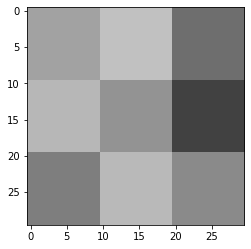

[[ 0.09674129 -0.16315005 -0.1309497 ]
 [-0.54981632 -0.2467851  -0.58047293]
 [ 0.25238332 -0.41422266 -0.10699489]]


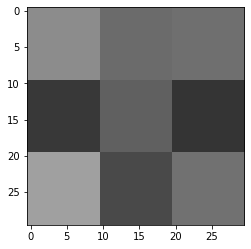

[[-0.37163991 -0.04686788  0.08698218]
 [ 0.18991503 -0.06686905  0.23364054]
 [ 0.58113312  0.443969    0.47134914]]


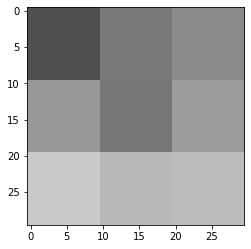

[[-0.35559352 -0.33828364 -0.0886534 ]
 [-0.09574892  0.07739999 -0.59072216]
 [-0.43771587  0.21519529 -0.3863192 ]]


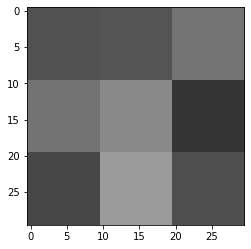

[[ 0.41241243  0.26776019 -0.39050243]
 [ 0.38252677 -0.20369523 -0.00644991]
 [ 0.23696349  0.50378744  0.32850382]]


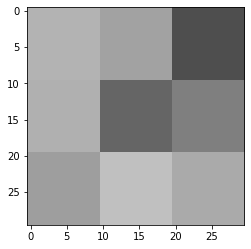

[[-0.13760716  0.33084306 -0.16739304]
 [-0.37173666 -0.34327399  0.13577678]
 [ 0.30711113 -0.2073475  -0.65712706]]


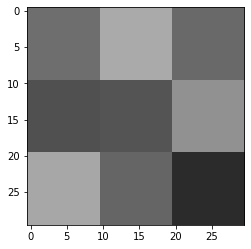

[[ 0.55144729  0.21120448  0.04653463]
 [ 0.53419348  0.33184756  0.17698198]
 [ 0.39829214  0.18155309 -0.17529068]]


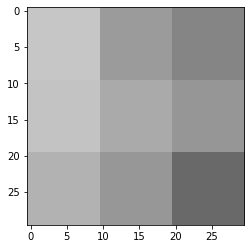

[[ 0.23216369 -0.03715632 -0.04484093]
 [ 0.2114662   0.41384477  0.3988431 ]
 [ 0.35224102  0.52908664  0.4045257 ]]


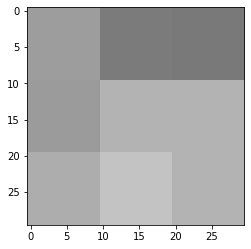

In [60]:
from PIL import Image
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from PIL import Image

filter_before_inverse, filter_after_inverse = conv.return_filters()
for i in filter_before_inverse:
    i = i / np.linalg.norm(i)
    print(i)
    l = np.asarray(i)
#     l = l.astype('uint8')
    filter_array = l
    temp = []
    for i in filter_array:
        row = []
        for k in i:
            for n in range(10):
                row.append(k)
        for n in range(10):
            temp.append(row)
    temp = np.asarray(temp)
    arr = np.asarray(temp)
#     print(arr)
    plt.imshow(arr, cmap='gray', vmin=-1, vmax=1)
    plt.show()